In [8]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
train = pd.read_csv('train.csv', engine='python')
test = pd.read_csv('test.csv', engine = 'python')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    4055 non-null   float64
 11  겨울_구매건수    4103 non-null   float64
 12  봄_구매건수     4311 non-null   float64
 13  여름_구매건수    3978 non-null   float64
 14  아침_구매건수    3558 non-null   float64
 15  저녁_구매건수    4033 non-null   float64
 16  점심_구매건수    4855 non-null   float64
 17  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


In [11]:
train.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A


In [12]:
train = train.fillna(0)
test = test.fillna(0)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    5000 non-null   float64
 11  겨울_구매건수    5000 non-null   float64
 12  봄_구매건수     5000 non-null   float64
 13  여름_구매건수    5000 non-null   float64
 14  아침_구매건수    5000 non-null   float64
 15  저녁_구매건수    5000 non-null   float64
 16  점심_구매건수    5000 non-null   float64
 17  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


In [14]:
train_ID = train['custid']
test_id = test['custid']

train.drop('custid', axis=1, inplace=True)
test.drop('custid', axis=1, inplace=True)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gender     5000 non-null   int64  
 1   총구매액       5000 non-null   int64  
 2   구매건수       5000 non-null   int64  
 3   평균구매가격     5000 non-null   int64  
 4   평균할부개월수    5000 non-null   float64
 5   구매브랜드종류    5000 non-null   int64  
 6   내점일수       5000 non-null   int64  
 7   수입상품_구매비율  5000 non-null   float64
 8   주말방문비율     5000 non-null   float64
 9   가을_구매건수    5000 non-null   float64
 10  겨울_구매건수    5000 non-null   float64
 11  봄_구매건수     5000 non-null   float64
 12  여름_구매건수    5000 non-null   float64
 13  아침_구매건수    5000 non-null   float64
 14  저녁_구매건수    5000 non-null   float64
 15  점심_구매건수    5000 non-null   float64
 16  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(6), object(1)
memory usage: 664.2+ KB


In [16]:
# 한글로 하면 계속 에러날거같으니까
# 그냥 죄다 영어로 바꾸자
# 나중에 어렵게하고싶지 않아.

train=train.rename(columns={'총구매액':'tot_price', '구매건수':'count', 
                         '평균구매가격':'avg_price', '평균할부개월수':'avg_install',
                         '구매브랜드종류':'brand_category', '내점일수':'visited', 
                         '수입상품_구매비율':'income_rate', '주말방문비율':'week_visited',
                         '가을_구매건수':'fall_count', '겨울_구매건수':'wint_count',
                         '봄_구매건수':'spring_count', '여름_구매건수':'summer_count',
                         '아침_구매건수':'morning_count', '저녁_구매건수':'night_count',
                         '점심_구매건수':'after_count', '주구매코너':'major'})
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          5000 non-null   int64  
 1   tot_price       5000 non-null   int64  
 2   count           5000 non-null   int64  
 3   avg_price       5000 non-null   int64  
 4   avg_install     5000 non-null   float64
 5   brand_category  5000 non-null   int64  
 6   visited         5000 non-null   int64  
 7   income_rate     5000 non-null   float64
 8   week_visited    5000 non-null   float64
 9   fall_count      5000 non-null   float64
 10  wint_count      5000 non-null   float64
 11  spring_count    5000 non-null   float64
 12  summer_count    5000 non-null   float64
 13  morning_count   5000 non-null   float64
 14  night_count     5000 non-null   float64
 15  after_count     5000 non-null   float64
 16  major           5000 non-null   object 
dtypes: float64(10), int64(6), object(

In [17]:
# 수치형으로 입력할경우 순위가 생기기떄문에 안됨
# 그래서 one-hot 인코딩으로 



train['major'].value_counts()

일반식품        1306
화장품         1206
유니캐주얼        410
유아동복         383
스포츠          301
영캐주얼         246
캐릭터캐주얼       188
수입명품         136
섬유            96
니트단품          91
트래디셔널캐주얼      91
정장셔츠          90
엘레강스캐주얼       78
피혁A           75
장신구           68
피혁B           56
디자이너부띠끄       51
문화완구          38
조리욕실          28
가전            18
기타바이어         12
도자기크리스탈       11
침구수예           8
가구             7
타운모피           6
Name: major, dtype: int64

In [18]:
# major를 숫자화 한다
train['major'] = train['major'].astype('category')
train['major'] = train['major'].cat.codes
train['major'].value_counts()

14    1306
24    1206
12     410
13     383
9      301
11     246
19     188
8      136
7       96
21      91
3       91
16      90
10      78
22      75
15      68
23      56
5       51
6       38
17      28
1       18
2       12
4       11
18       8
0        7
20       6
Name: major, dtype: int64

In [19]:
df_corr = train.corr()
df_corr

,gender,tot_price,count,avg_price,avg_install,brand_category,visited,income_rate,week_visited,fall_count,wint_count,spring_count,summer_count,morning_count,night_count,after_count,major
gender,1.000000,0.099137,0.094022,0.072181,-0.020066,0.083988,0.084255,-0.021294,0.020457,0.088600,0.065261,0.076116,0.101900,0.127779,-0.021618,0.097237,-0.039270
tot_price,0.099137,1.000000,0.712183,0.376395,0.137335,0.714774,0.617210,-0.048053,-0.048515,0.657523,0.620446,0.635757,0.619743,0.456158,0.398494,0.709572,-0.141735
count,0.094022,0.712183,1.000000,-0.057376,-0.037878,0.869075,0.942115,-0.210022,-0.096558,0.896969,0.879652,0.895580,0.883784,0.672721,0.643764,0.945027,-0.143826
avg_price,0.072181,0.376395,-0.057376,1.000000,0.407556,0.002931,-0.091136,0.189608,0.036426,-0.036019,-0.052918,-0.048857,-0.064851,-0.040362,-0.092749,-0.028726,-0.044333
avg_install,-0.020066,0.137335,-0.037878,0.407556,1.000000,-0.002074,-0.076343,0.097727,-0.001625,-0.018789,-0.039526,-0.033855,-0.041831,-0.047450,-0.051170,-0.014389,-0.021258
brand_category,0.083988,0.714774,0.869075,0.002931,-0.002074,1.000000,0.780303,-0.234547,-0.080674,0.777740,0.774681,0.784562,0.755035,0.582657,0.578552,0.813712,-0.166345
visited,0.084255,0.617210,0.942115,-0.091136,-0.076343,0.780303,1.000000,-0.225363,-0.114795,0.843133,0.836375,0.843763,0.827751,0.638138,0.634809,0.875888,-0.136688
income_rate,-0.021294,-0.048053,-0.210022,0.189608,0.097727,-0.234547,-0.225363,1.000000,0.016123,-0.183411,-0.185994,-0.193382,-0.184013,-0.133133,-0.170649,-0.186310,0.277087
week_visited,0.020457,-0.048515,-0.096558,0.036426,-0.001625,-0.080674,-0.114795,0.016123,1.000000,-0.084014,-0.071125,-0.093424,-0.092989,-0.113193,-0.006852,-0.094814,0.064942
fall_count,0.088600,0.657523,0.896969,-0.036019,-0.018789,0.777740,0.843133,-0.183411,-0.084014,1.000000,0.729604,0.732474,0.735223,0.607713,0.572024,0.848190,-0.119888


In [20]:
pd.DataFrame(abs(train.corr()['gender']).sort_values(ascending = False))

,gender
gender,1.000000
morning_count,0.127779
summer_count,0.101900
tot_price,0.099137
after_count,0.097237
count,0.094022
fall_count,0.088600
visited,0.084255
brand_category,0.083988
spring_count,0.076116


In [21]:
## get the most important variables. 
corr = train.corr()**2
corr.gender.sort_values(ascending=False)

gender            1.000000
morning_count     0.016327
summer_count      0.010384
tot_price         0.009828
after_count       0.009455
count             0.008840
fall_count        0.007850
visited           0.007099
brand_category    0.007054
spring_count      0.005794
avg_price         0.005210
wint_count        0.004259
major             0.001542
night_count       0.000467
income_rate       0.000453
week_visited      0.000418
avg_install       0.000403
Name: gender, dtype: float64

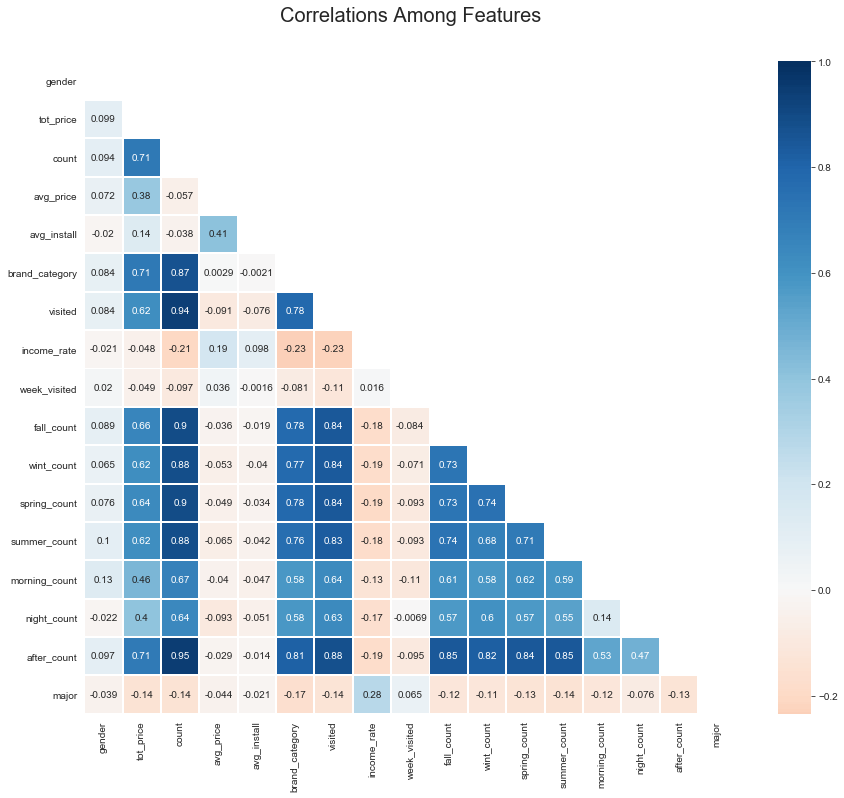

In [22]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
import numpy as np
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

In [23]:
#feature engineering
# introduce new feature
train['tot_exported_goods'] = np.where((train['income_rate']!=0),
                                (train['income_rate']* train['tot_price']) / 100, 0)

In [27]:
#feature engineering

# 건수 Feature들을 최소단위 정보인 구매건당 구매액로 변경
def createFeatures(df_p):
    df_p['morning_price'] = np.round(df_p['tot_price']*(df_p['morning_count'] /df_p['count'] ), 3)
    df_p['after_price'] = np.round(df_p['tot_price']*(df_p['after_count'] /df_p['count'] ), 3)
    df_p['night_price'] = np.round(df_p['tot_price']*(df_p['night_count'] /df_p['count'] ), 3)  
    df_p['spring_price']   = np.round(df_p['tot_price']*(df_p['spring_count'] /df_p['count'] ), 3) 
    df_p['summer_price'] = np.round(df_p['tot_price']*(df_p['summer_count'] /df_p['count'] ), 3) 
    df_p['fall_price'] = np.round(df_p['tot_price']*(df_p['fall_count'] /df_p['count'] ), 3)  
    df_p['wint_price'] = np.round(df_p['tot_price']*(df_p['wint_count'] /df_p['count'] ), 3)  
    df_p['visited_price'] = np.round(df_p['count'] /df_p['visited'], 3)

def dropFeatures(df_p):
    drop_cols = ['morning_count', 'after_count', 'night_count',
         'spring_count', 'summer_count', 'fall_count', 'wint_count'] 
    
    return df_p.drop(drop_cols, axis=1)

createFeatures(train)
dataPP = dropFeatures(train) 
dataPP[(dataPP['major']==2)].head()

,gender,tot_price,count,avg_price,avg_install,brand_category,visited,income_rate,week_visited,major,tot_exported_goods,morning_price,after_price,night_price,spring_price,summer_price,fall_price,wint_price,visited_price
39,0,454800,5,90960,3.0,4,4,20.0,25.0,2,90960.00,0.000,90960.000,363840.000,454800.000,0.000,0.000,0.000,1.250
478,0,4712934,19,248049,2.3,10,12,10.5,33.3,2,494858.07,992196.632,3224639.053,496098.316,744147.474,992196.632,1736344.105,1240245.789,1.583
1126,1,1497200,12,124767,3.8,8,8,25.0,62.5,2,374300.00,124766.667,499066.667,873366.667,249533.333,499066.667,748600.000,0.000,1.500
1265,0,951000,12,79250,1.7,10,3,0.0,33.3,2,0.00,554750.000,396250.000,0.000,158500.000,0.000,792500.000,0.000,4.000
1612,0,253000,8,31625,1.0,6,7,12.5,14.3,2,31625.00,63250.000,189750.000,0.000,94875.000,158125.000,0.000,0.000,1.143


In [25]:
train.gender.value_counts() 

0    3479
1    1521
Name: gender, dtype: int64

In [29]:
# 학습용 데이터 확정
# Pre-Modeling Tasks
# separating our independent and dependent variable

dfX = dataPP.drop(['gender', 'avg_install','income_rate'], axis = 1)
dfy = dataPP["gender"]

dfX.tail(2)

,tot_price,count,avg_price,brand_category,visited,week_visited,major,tot_exported_goods,morning_price,after_price,night_price,spring_price,summer_price,fall_price,wint_price,visited_price
4998,654498,13,50346,10,7,14.3,22,50396.346,0.00,553806.000,100692.000,100692.000,50346.000,302076.000,201384.000,1.857
4999,2554723,32,79835,9,26,34.6,14,559484.337,638680.75,1516866.781,399175.469,798350.938,878186.031,479010.562,399175.469,1.231


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy,test_size = .25, random_state=0)

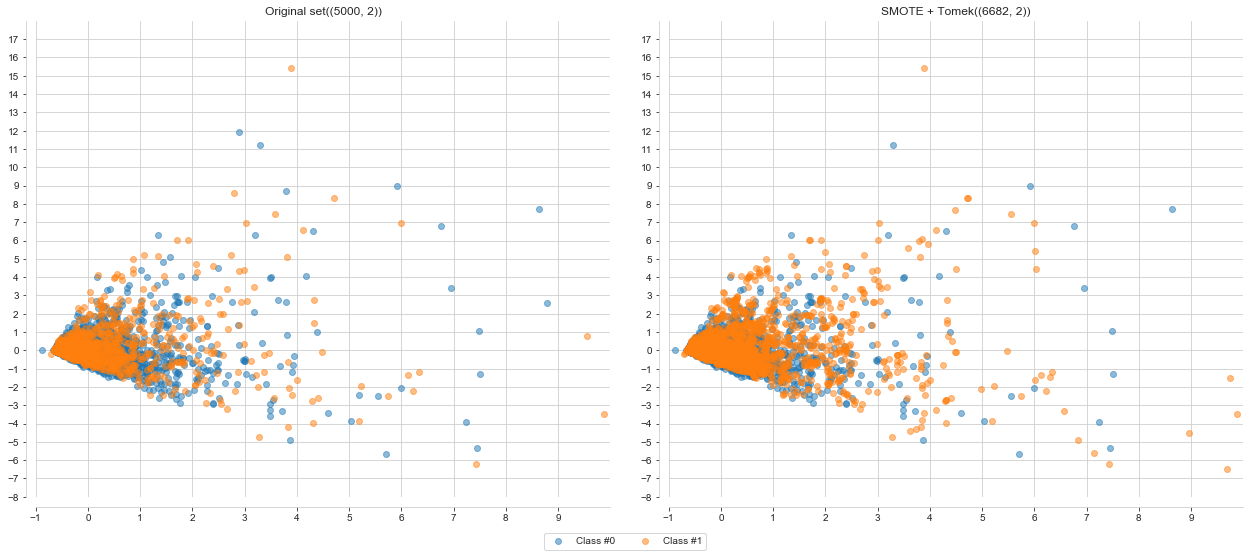

(5000, 16) (6682, 16) (5011, 16) (1671, 16)


In [33]:
from imblearn.combine import *

# PCA로 feature 2개만 선택하여 Scatter로 시각화해 봄..
pca = PCA(n_components=2)
X_org = pca.fit_transform(dfX)
y_org = np.array(dfy)
X_resampled, y_resampled = SMOTETomek(random_state=0).fit_sample(dfX, dfy)
X_pca = pca.transform(X_resampled)

scaler = StandardScaler()
X_org_scaled = scaler.fit_transform(X_org)
X_pca_scaled = scaler.transform(X_pca)

title1 = 'Original set('+ str(X_org_scaled.shape) +')'
title2 = 'SMOTE + Tomek('+ str(X_pca_scaled.shape) +')'
xlim = [-1, 10]
ylim = [-8, 18]
xticks = range(-1, 10)
yticks = range(-8, 18)

# Scatter 그래프 그리기
drawSMOTETomek(X_org_scaled, y_org, X_pca_scaled, y_resampled, title1, title2, xlim, ylim, xticks, yticks)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=0)
print(dfX.shape, X_resampled.shape, X_train.shape, X_test.shape)

In [34]:
# scoring="roc_auc|f1" => 0.496
temp_param1 = bestModel('SVC', 5, 'GRID', X_train, y_train, 'minmax', True, False, 'f1', -1, 10, 5)
best_param1 = {key.split("__")[1]:value for key, value in temp_param1.items() if key != 'polynomialfeatures__degree'}
svm1 = SVC(**best_param1)
score_svm1 = svm1.fit(X_train, y_train).score(X_test, y_test)
print("score_svm1 ::: {}".format(score_svm1))
print("-----------------------------------")
y_svm1 = svm1.predict(X_test)
print(classification_report(y_test, y_svm1))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  8.7min finished


score_svm1 ::: 0.4931178934769599
-----------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       847
           1       0.49      1.00      0.66       824

    accuracy                           0.49      1671
   macro avg       0.25      0.50      0.33      1671
weighted avg       0.24      0.49      0.33      1671



In [35]:
# scoring="roc_auc|f1" => 0.755
# categories_indices = [X_train.columns.get_loc(col) for col in ['주구매코너']]
best_param1 = bestGBDTNextModel('LGBM', False, 5, 'RANDOM', X_train, y_train, X_test, y_test, 15, 'roc_auc', 0, 3, -1)
lgbm1 = LGBMClassifier(**best_param1)
score_lgbm1 = lgbm1.fit(X_train, y_train).score(X_test, y_test)
print("score_lgbm1 ::: {}".format(score_lgbm1))
print("-----------------------------------")
y_lgbm1 = lgbm1.predict(X_test)
print(classification_report(y_test, y_lgbm1))

# 최고=0.755 Score LGBM best_estimator
#  LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
#         importance_type='split', lambda_l1=0.01, lambda_l2=0,
#         learning_rate=0.01, max_depth=50, metric='auc',
#         min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=20,
#         min_split_gain=0.0, n_estimators=300, n_jobs=-1,
#         num_boost_round=4000, num_leaves=150, objective='binary',
#         random_state=0, reg_alpha=0.1, reg_lambda=0.0, silent=True,
#         subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 10.7min finished


LGBM grid_.best_score 0.825
LGBM grid_.best_score 0.85
LGBM best_estimator LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', lambda_l1=0.01, lambda_l2=0.01,
               learning_rate=0.01, max_depth=100, metric='auc',
               min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=20, min_split_gain=0.0, n_estimators=300,
               n_jobs=-1, num_boost_round=5000, num_leaves=150,
               objective='binary', random_state=0, reg_alpha=0.01,
               reg_lambda=0.01, silent=True, subsample=1,
               subsample_for_bin=200000, subsample_freq=0)
score_lgbm1 ::: 0.7666068222621185
-----------------------------------
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       847
           1       0.76      0.78      0.77       824

    accuracy                           0.77      1671
   macro avg       0.77      0.77      

In [38]:
#Best Model training

In [36]:
best_model1 = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
         importance_type='split', lambda_l1=0.01, lambda_l2=0,
         learning_rate=0.01, max_depth=50, metric='auc',
         min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=20,
         min_split_gain=0.0, n_estimators=300, n_jobs=-1,
         num_boost_round=4000, num_leaves=150, objective='binary',
         random_state=0, reg_alpha=0.1, reg_lambda=0.0, silent=True,
         subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

score_best1 = best_model1.fit(X_train, y_train).score(X_test, y_test)
y_best1 = best_model1.predict(X_test)

print("best_model1 -----------------------------{}".format(score_best1))
print(classification_report(y_test, y_best1))

best_model1 -----------------------------0.772591262716936
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       847
           1       0.76      0.79      0.77       824

    accuracy                           0.77      1671
   macro avg       0.77      0.77      0.77      1671
weighted avg       0.77      0.77      0.77      1671



In [37]:
best_model2 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bytree=1, gamma=0, learning_rate=0.07, max_delta_step=0,
        max_depth=7, min_child_weight=1, missing=None, n_estimators=700,
        n_jobs=1, nthread=3, objective='binary:logistic', random_state=0,
        reg_alpha=0.01, reg_lambda=0.1, scale_pos_weight=1, seed=None,
        silent=True, subsample=1)

score_best2 = best_model2.fit(X_train, y_train).score(X_test, y_test)
y_best2 = best_model2.predict(X_test)

print("best_model2 -----------------------------{}".format(score_best2))
print(classification_report(y_test, y_best2))

best_model2 -----------------------------0.755834829443447
              precision    recall  f1-score   support

           0       0.77      0.74      0.76       847
           1       0.75      0.77      0.76       824

    accuracy                           0.76      1671
   macro avg       0.76      0.76      0.76      1671
weighted avg       0.76      0.76      0.76      1671



In [40]:
#여기서 다른것을 써서 accuracy 를 더 오려야 됀다.

SMOTETomek로 재샘플링한 데이터가 narray 형식이므로 예측용 데이터도 narray로 변환하여 예측한다.

In [39]:
X_pred = newsPP.drop(['주말방문비율', '저녁구매액', '평균할부개월수','수입상품_구매비율','주구매코너'], axis=1)
new_D = X_pred.copy()
new_T = dataPT.drop(['주말방문비율', '저녁구매액', '평균할부개월수','수입상품_구매비율','주구매코너'], axis=1)
new_T = new_T.drop('gender', axis=1)
new_T.tail(2)

NameError: name 'X_pred' is not defined